# Prerequisites

In [95]:
import importlib
import src.utils.dgp
import src.main.evaluate

# Reload the modules
importlib.reload(src.utils.dgp)
importlib.reload(src.main.evaluate)

# Re-import the specific functions
from src.utils.dgp import get_market_data_generator, plot_tau_function, plot_temporal_data,create_panel_data
from src.main.evaluate import *

# DGP

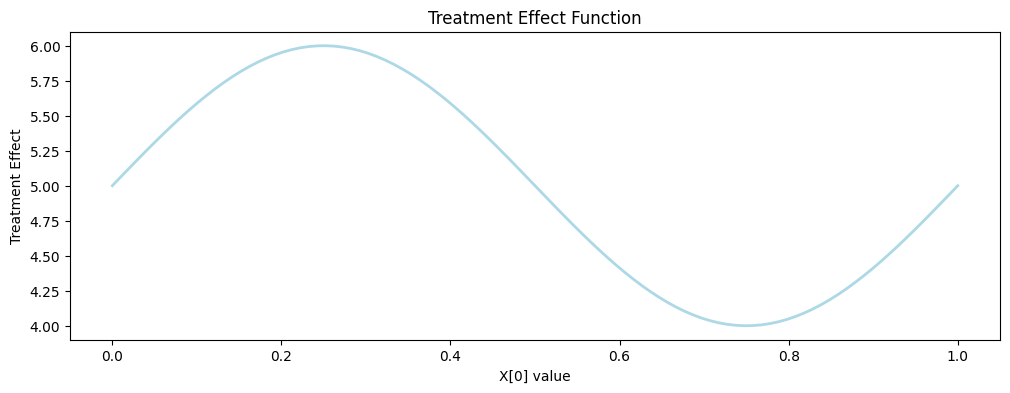

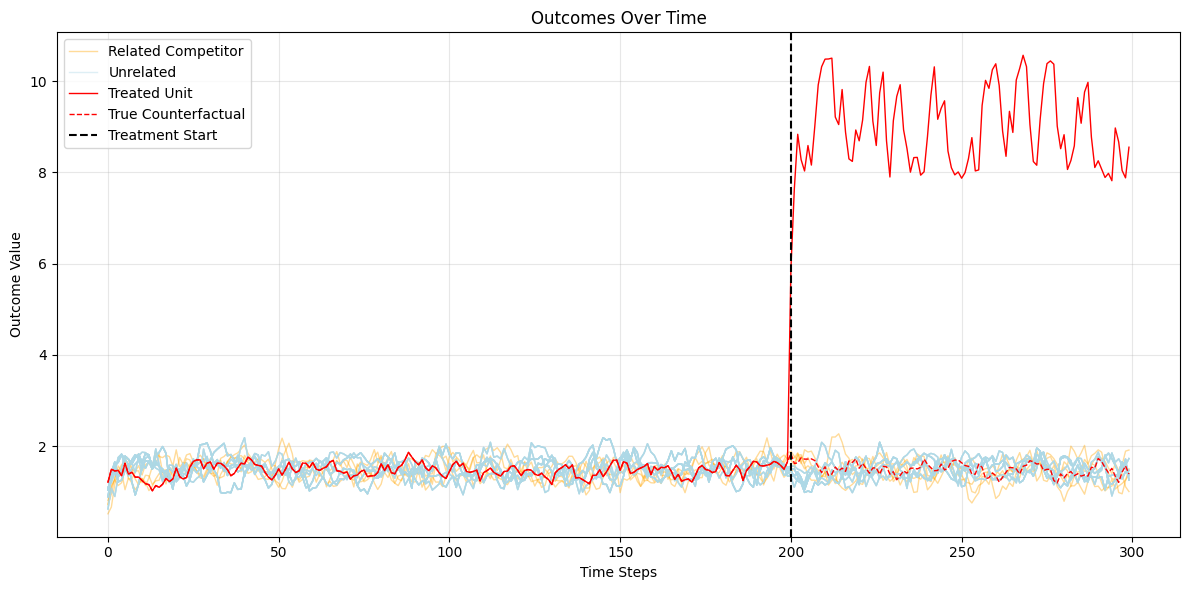

In [3]:
# Example usage
#np.random.seed(42)
n_subjects = 10
n_competitors = 4
n_timesteps = 300
d = 5
sigma = 0.1
competitor_correlation = 0.3
increase_trend = 0
divergence = 0
gen_data_fn, base_fn, tau_fn = get_market_data_generator(
    n_subjects, n_timesteps, d, sigma, n_competitors=n_competitors, 
    competitor_correlation=competitor_correlation, setup = 'A', increase_trend=increase_trend, divergence=divergence)

Y, T, X, treated_unit, competitor_idx, Y_c = gen_data_fn()
plot_tau_function(tau_fn)
plot_temporal_data(Y, T, X, treated_unit, competitor_idx,Y_c)

# Simulations

In [36]:
df

,subject_id,time,Y,Y_c,T,unit_type,is_post,X0,X1,X2,X3,X4
0,0,0,0.725759,0.725759,0.0,treated,False,0.612170,0.169070,0.436059,0.769262,0.295325
1,0,1,1.077164,1.077164,0.0,treated,False,0.546724,0.567914,0.426519,0.544051,0.155884
2,0,2,1.341749,1.341749,0.0,treated,False,0.302916,0.438069,0.316943,0.758121,0.532651
3,0,3,1.425117,1.425117,0.0,treated,False,0.512164,0.549480,0.197350,0.727703,0.398979
4,0,4,1.552339,1.552339,0.0,treated,False,0.586857,0.694131,0.292773,0.576942,0.613554
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9,295,7.282194,7.282194,0.0,other,True,0.332092,0.620325,0.442445,0.791362,0.604631
2996,9,296,7.334475,7.334475,0.0,other,True,0.613016,0.535020,0.523790,0.762670,0.443987
2997,9,297,7.610331,7.610331,0.0,other,True,0.545549,0.481672,0.579155,0.599820,0.440862
2998,9,298,7.763394,7.763394,0.0,other,True,0.765679,0.628752,0.518270,0.553754,0.414365


In [42]:
post_periods = df[df['is_post'] == True]['time'].unique()
df_post = df[df['is_post'] == True]
print(len(calculate_true_effects(df_post, treated_unit, tau_fn)))
calculate_true_effects(df_post, treated_unit, tau_fn)


100


array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [43]:
sctest = fit_synthetic_control(df,treated_unit)
print(len(sctest))
print(sctest)

100
[5.49020575 5.31849936 5.17992034 5.25543744 5.36791493 5.53766455
 5.53479315 5.48299107 5.63038432 5.7832272  5.72267214 5.68772843
 5.69870406 5.7282874  5.84577332 5.73198531 5.76324113 5.85309921
 5.80888163 5.76400105 5.83516566 5.90221601 5.83090225 5.8845813
 5.78114866 5.9544575  6.04170492 6.1571278  6.1285609  6.14839073
 6.12380329 5.98202762 6.16137335 6.13403265 6.11214666 6.0490694
 6.15958723 6.19431712 6.29511636 6.23871452 6.19850842 6.15797603
 6.28155828 6.3854289  6.33366028 6.37013182 6.16842351 6.37602587
 6.38683479 6.43706358 6.33067649 6.30915105 6.33710821 6.47732684
 6.51993254 6.50642661 6.63088002 6.67629645 6.78115361 6.61457693
 6.64091778 6.59857677 6.76747671 6.72969485 6.76488758 6.88558389
 6.89423536 6.88871763 6.69507888 6.79093784 6.87643391 6.83561582
 6.90898959 6.91255293 7.13348678 7.11433389 6.98589747 6.87964472
 6.98320208 6.98380456 7.14947056 7.20221396 7.13822758 7.16450997
 7.22937125 7.16650484 7.10173874 7.10725456 7.06248238 7.24

In [44]:
sctest = fit_ar1(df,treated_unit)
print(len(sctest))
print(sctest)

100
[7.66214339 7.67636894 7.69050127 7.70454098 7.71848868 7.73234497
 7.74611046 7.75978574 7.7733714  7.78686803 7.8002762  7.81359651
 7.82682952 7.83997581 7.85303595 7.8660105  7.87890002 7.89170507
 7.90442621 7.91706397 7.92961892 7.94209159 7.95448251 7.96679224
 7.97902129 7.99117021 8.0032395  8.0152297  8.02714133 8.03897489
 8.0507309  8.06240986 8.07401229 8.08553869 8.09698955 8.10836536
 8.11966663 8.13089383 8.14204745 8.15312798 8.1641359  8.17507168
 8.18593578 8.1967287  8.20745088 8.21810279 8.2286849  8.23919766
 8.24964152 8.26001694 8.27032436 8.28056424 8.29073701 8.30084311
 8.31088299 8.32085706 8.33076578 8.34060956 8.35038882 8.360104
 8.36975551 8.37934377 8.3888692  8.3983322  8.40773318 8.41707256
 8.42635073 8.4355681  8.44472506 8.45382201 8.46285935 8.47183746
 8.48075673 8.48961756 8.49842031 8.50716537 8.51585313 8.52448395
 8.5330582  8.54157627 8.55003851 8.5584453  8.566797   8.57509396
 8.58333655 8.59152512 8.59966003 8.60774162 8.61577026 8.62

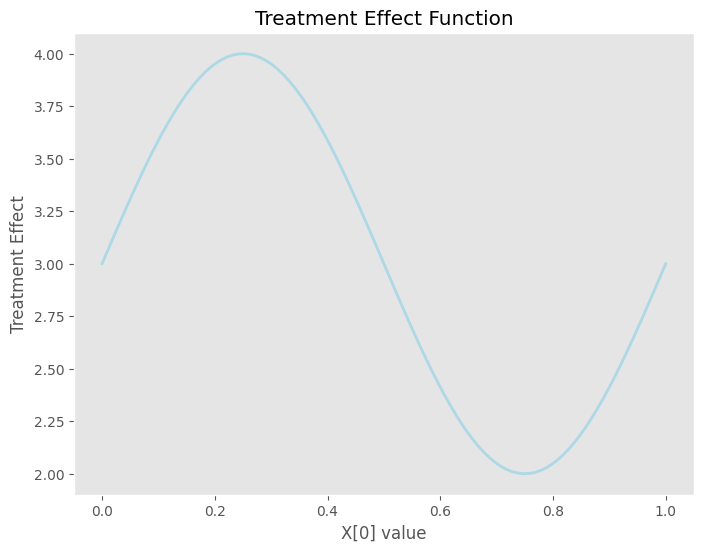

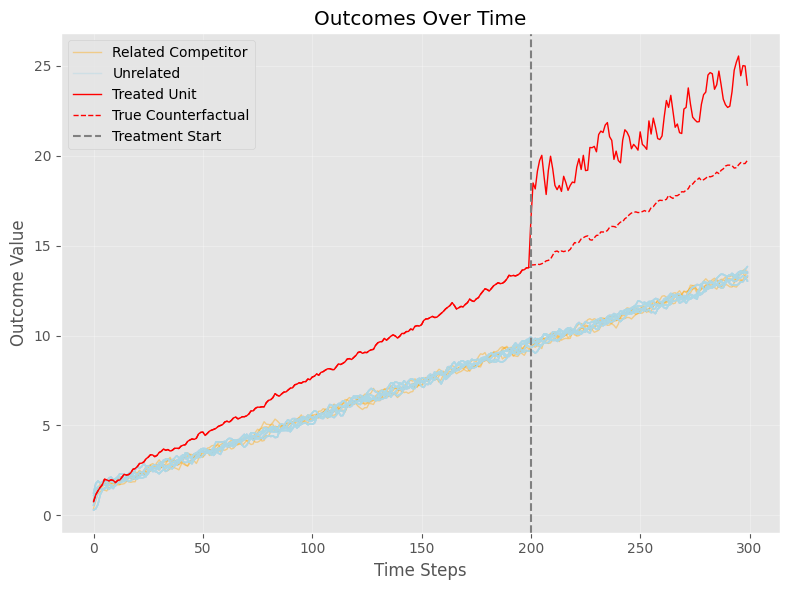

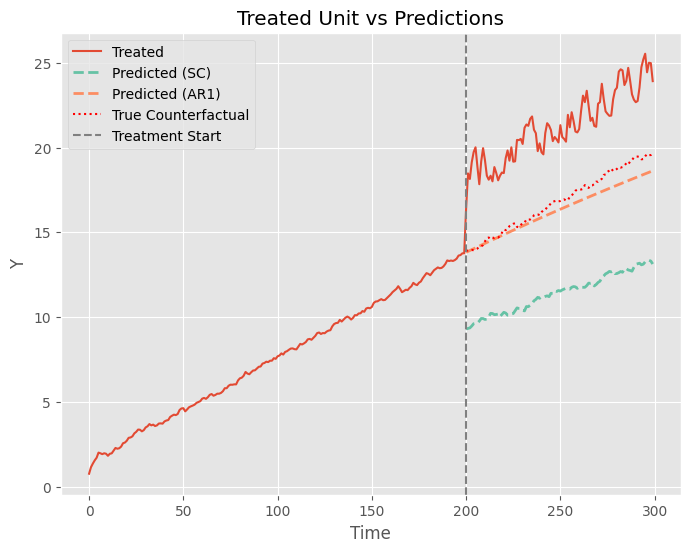

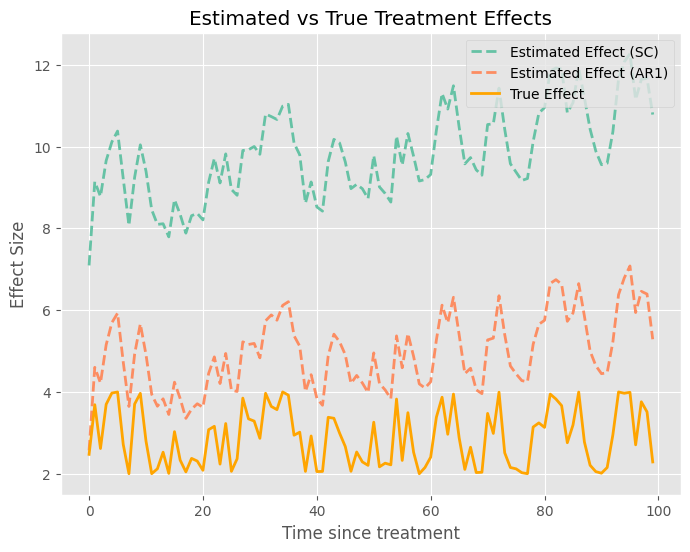


Performance Metrics (SC):
MSE: 48.8134, MAE: 6.9442, Bias: 6.9442

Performance Metrics (AR1):
MSE: 4.5057, MAE: 2.0548, Bias: 2.0548


In [98]:
np.random.seed(111)
n_subjects = 10
n_competitors = 4
n_timesteps = 300
d = 5
sigma = 0.02
competitor_correlation = 0.3
increase_trend = 0.02
divergence = 0.02
gen_data_fn, base_fn, tau_fn = get_market_data_generator(
    n_subjects, n_timesteps, d, sigma, n_competitors=n_competitors, 
    competitor_correlation=competitor_correlation, setup = 'A', increase_trend=increase_trend, divergence=divergence)

Y, T, X, treated_unit, competitor_idx, Y_c = gen_data_fn()
plot_tau_function(tau_fn)
plot_temporal_data(Y, T, X, treated_unit, competitor_idx,Y_c)

df = create_panel_data(Y, Y_c, T, X, treated_unit, competitor_idx)

results = evaluate_methods(df, treated_unit, competitor_idx, tau_fn, 
                         methods=['SC', 'AR1'], 
                         show=True)

In [76]:
# Run simulation with multiple methods
results_df = run_simulation(
    n_subjects=10,
    n_timesteps=300,
    d=5,
    sigmas=[0.01],
    n_competitors_list=[4],
    competitor_correlation=0.3,
    setups=['B'],
    increase_trends=[0.01],
    divergence_trends=[0.01, 0.02],
    methods=['SC', 'AR1'],
    n_runs=3
)

# View results
display(results_df)

,setup,sigma,n_competitors,increase_trend,divergence,mse_SC_avg,mse_SC_std,mae_SC_avg,bias_SC_avg,mse_AR1_avg,mse_AR1_std,mae_AR1_avg,bias_AR1_avg
0,B,0.01,4,0.01,0.01,18.358181,0.163918,4.264509,4.264509,6.366038,0.784786,2.458530,2.456828
1,B,0.01,4,0.01,0.02,49.373302,0.149560,6.988928,6.988928,6.424396,0.457320,2.456512,2.454456


In [100]:
!pip install nixtla


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
